<a href="https://colab.research.google.com/github/aya-mj/Supervised-Learning-Regression/blob/main/Supervised_Learning_Regression_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=90693b909583ae7815bcdc2e7309ed5c229762ff69eb58f0e802200505f1fa9d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [9]:
import pandas as pd
from ydata_profiling import ProfileReport

df1 = pd.read_csv("/content/drive/MyDrive/Checkpoints/ML/Projects/5G_energy_consumption_dataset.csv")

#df1.info()

profile = ProfileReport(df1,title = "5G_energy Report")
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
#cleaning the data
print("missing values")
missing_values = df1.isnull().sum()
print(missing_values)

print("duplicate values")
df1.duplicated().sum()

####print("\nOutliers")
for col in df1.select_dtypes(include=['float64','int64']).columns:
  df1[col].fillna(df1[col].mean())
for col in df1.select_dtypes(include=['object']).columns:
  df1[col].fillna(df1[col].mode()[0])

missing values
Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64
duplicate values

Outliers


In [21]:
#Encode categorical features
df2 = pd.get_dummies(df1,drop_first=True)
df1.head()
df2.head()


,Energy,load,ESMODE,TXpower,Time_20230101 020000,Time_20230101 030000,Time_20230101 040000,Time_20230101 050000,Time_20230101 060000,Time_20230101 070000,...,BS_B_990,BS_B_991,BS_B_992,BS_B_993,BS_B_994,BS_B_995,BS_B_996,BS_B_997,BS_B_998,BS_B_999
0,64.275037,0.487936,0.0,7.101719,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,55.904335,0.344468,0.0,7.101719,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,57.698057,0.193766,0.0,7.101719,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,55.156951,0.222383,0.0,7.101719,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56.053812,0.175436,0.0,7.101719,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
##Select your target variable and the features
X = df2.drop('Energy', axis=1)
y = df2['Energy']


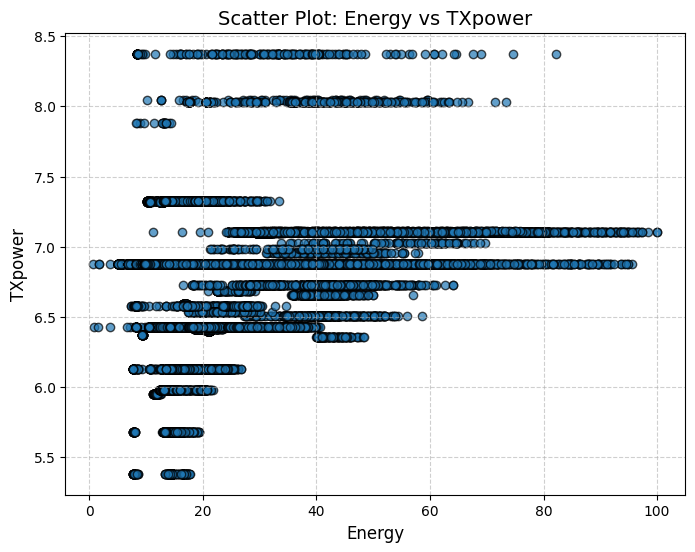

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df1['Energy'], df1['TXpower'], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot: Energy vs TXpower', fontsize=14)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('TXpower', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [23]:
###Split your dataset to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
##Based on your data exploration phase select a ML regression algorithm and train it on the training set
from sklearn.linear_model import LinearRegression

#Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
##Assess your model performance on the test set using relevant evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluate performance
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))



R² Score: 0.9560819300225438
MSE: 8.335924046110346
